In [8]:
import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings

In [9]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

In [10]:
def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(96, 96))
    img = np.ravel(img) / 255.0
    return img

In [11]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure JPG
        if img.suffix == '.jpg':
            # Two images failed for whatever reason, so let's just ignore them
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    # Add a class column - dog or a cat
    processed['class'] = folder.parts[-1]
    
    return processed

In [13]:
%%time

train_cat = process_folder(folder=pathlib.Path.cwd().joinpath('data/train/cat'))
train_dog = process_folder(folder=pathlib.Path.cwd().joinpath('data/train/dog'))

train_set = pd.concat([train_cat, train_dog], axis=0)

with open('train_set.pkl', 'wb') as f:
    pickle.dump(train_set, f)

CPU times: user 2min 42s, sys: 49.3 s, total: 3min 31s
Wall time: 4min 56s


In [14]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.694118,0.698039,0.670588,0.505882,0.615686,0.690196,0.674510,0.654902,0.533333,0.666667,...,0.262745,0.258824,0.223529,0.490196,0.850980,0.596078,0.552941,0.647059,0.682353,cat
1,0.360784,0.356863,0.313725,0.313725,0.345098,0.333333,0.349020,0.360784,0.349020,0.400000,...,0.047059,0.047059,0.050980,0.050980,0.062745,0.035294,0.023529,0.094118,0.141176,cat
2,0.329412,0.329412,0.325490,0.325490,0.325490,0.325490,0.325490,0.329412,0.321569,0.317647,...,0.850980,0.835294,0.807843,0.768627,0.745098,0.721569,0.694118,0.654902,0.611765,cat
3,0.517647,0.439216,0.388235,0.396078,0.403922,0.403922,0.407843,0.411765,0.415686,0.419608,...,0.992157,0.992157,0.996078,1.000000,0.988235,0.960784,0.976471,0.968627,0.960784,cat
4,0.188235,0.207843,0.254902,0.305882,0.313725,0.403922,0.454902,0.470588,0.490196,0.396078,...,0.745098,0.721569,0.725490,0.623529,0.333333,0.650980,0.643137,0.639216,0.541176,cat


In [15]:
train_set.shape


(20031, 9217)

In [16]:
%%time

test_cat = process_folder(folder=pathlib.Path.cwd().joinpath('data/test/cat'))
test_dog = process_folder(folder=pathlib.Path.cwd().joinpath('data/test/dog'))

test_set = pd.concat([test_cat, test_dog], axis=0)

with open('test_set.pkl', 'wb') as f:
    pickle.dump(test_set, f)


CPU times: user 15 s, sys: 1.83 s, total: 16.9 s
Wall time: 22.5 s


In [17]:
test_set.shape


(2489, 9217)

In [18]:

%%time

valid_cat = process_folder(folder=pathlib.Path.cwd().joinpath('data/validation/cat'))
valid_dog = process_folder(folder=pathlib.Path.cwd().joinpath('data/validation/dog'))

valid_set = pd.concat([valid_cat, valid_dog], axis=0)

with open('valid_set.pkl', 'wb') as f:
    pickle.dump(valid_set, f)

CPU times: user 16.2 s, sys: 2 s, total: 18.2 s
Wall time: 25.1 s


In [19]:
valid_set.shape


(2478, 9217)

In [20]:
train_set = shuffle(train_set).reset_index(drop=True)
valid_set = shuffle(valid_set).reset_index(drop=True)

In [21]:
train_set.head()


,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.858824,0.850980,0.854902,0.858824,0.850980,0.823529,0.768627,0.666667,0.584314,0.549020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,dog
1,0.713725,0.780392,0.725490,0.658824,0.682353,0.666667,0.701961,0.729412,0.733333,0.733333,...,0.478431,0.505882,0.607843,0.627451,0.647059,0.643137,0.635294,0.607843,0.698039,dog
2,0.243137,0.403922,0.509804,0.584314,0.596078,0.611765,0.627451,0.635294,0.643137,0.650980,...,0.580392,0.564706,0.556863,0.541176,0.525490,0.521569,0.525490,0.513725,0.501961,dog
3,0.282353,0.301961,0.321569,0.349020,0.337255,0.364706,0.372549,0.411765,0.415686,0.396078,...,0.423529,0.431373,0.431373,0.435294,0.435294,0.439216,0.454902,0.466667,0.494118,cat
4,0.141176,0.152941,0.164706,0.184314,0.203922,0.215686,0.223529,0.215686,0.235294,0.235294,...,0.231373,0.250980,0.266667,0.274510,0.286275,0.294118,0.301961,0.305882,0.301961,dog


In [22]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_valid = valid_set.drop('class', axis=1)
y_valid = valid_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [23]:
y_train.factorize()


(array([0, 0, 0, ..., 1, 0, 1]), Index(['dog', 'cat'], dtype='object'))

In [24]:
y_train = tf.keras.utils.to_categorical(y_train.factorize()[0], num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid.factorize()[0], num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test.factorize()[0], num_classes=2)


In [25]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)


Epoch 1/100
157/157 [==============================] - 30s 173ms/step - loss: 1.0615 - accuracy: 0.5280 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 2/100
157/157 [==============================] - 29s 184ms/step - loss: 0.6792 - accuracy: 0.5692 - val_loss: 0.6798 - val_accuracy: 0.5718
Epoch 3/100
157/157 [==============================] - 34s 219ms/step - loss: 0.6711 - accuracy: 0.5830 - val_loss: 0.6653 - val_accuracy: 0.5973
Epoch 4/100
157/157 [==============================] - 26s 164ms/step - loss: 0.6611 - accuracy: 0.6024 - val_loss: 0.6639 - val_accuracy: 0.6110
Epoch 5/100
157/157 [==============================] - 28s 176ms/step - loss: 0.6574 - accuracy: 0.6069 - val_loss: 0.6614 - val_accuracy: 0.5989
Epoch 6/100
157/157 [==============================] - 23s 147ms/step - loss: 0.6518 - accuracy: 0.6149 - val_loss: 0.6629 - val_accuracy: 0.6029
Epoch 7/100
157/157 [==============================] - 26s 165ms/step - loss: 0.6497 - accuracy: 0.6175 - val_loss: 0.6576 -

Epoch 57/100
157/157 [==============================] - 20s 127ms/step - loss: 0.5221 - accuracy: 0.7281 - val_loss: 0.7843 - val_accuracy: 0.6049
Epoch 58/100
157/157 [==============================] - 21s 133ms/step - loss: 0.5161 - accuracy: 0.7355 - val_loss: 0.7893 - val_accuracy: 0.6057
Epoch 59/100
157/157 [==============================] - 20s 128ms/step - loss: 0.5266 - accuracy: 0.7236 - val_loss: 0.7695 - val_accuracy: 0.6005
Epoch 60/100
157/157 [==============================] - 20s 127ms/step - loss: 0.5183 - accuracy: 0.7300 - val_loss: 0.7401 - val_accuracy: 0.6146
Epoch 61/100
157/157 [==============================] - 20s 128ms/step - loss: 0.5253 - accuracy: 0.7267 - val_loss: 0.7133 - val_accuracy: 0.6057
Epoch 62/100
157/157 [==============================] - 20s 128ms/step - loss: 0.5151 - accuracy: 0.7337 - val_loss: 0.8592 - val_accuracy: 0.6037
Epoch 63/100
157/157 [==============================] - 20s 127ms/step - loss: 0.5046 - accuracy: 0.7397 - val_loss: 0

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

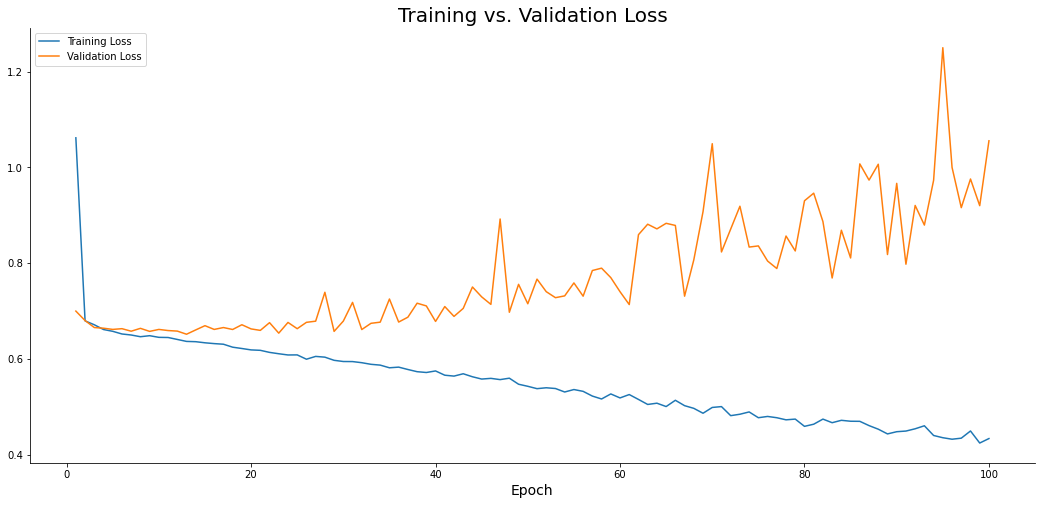

In [27]:
plt.plot(np.arange(1, 101), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 101), history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

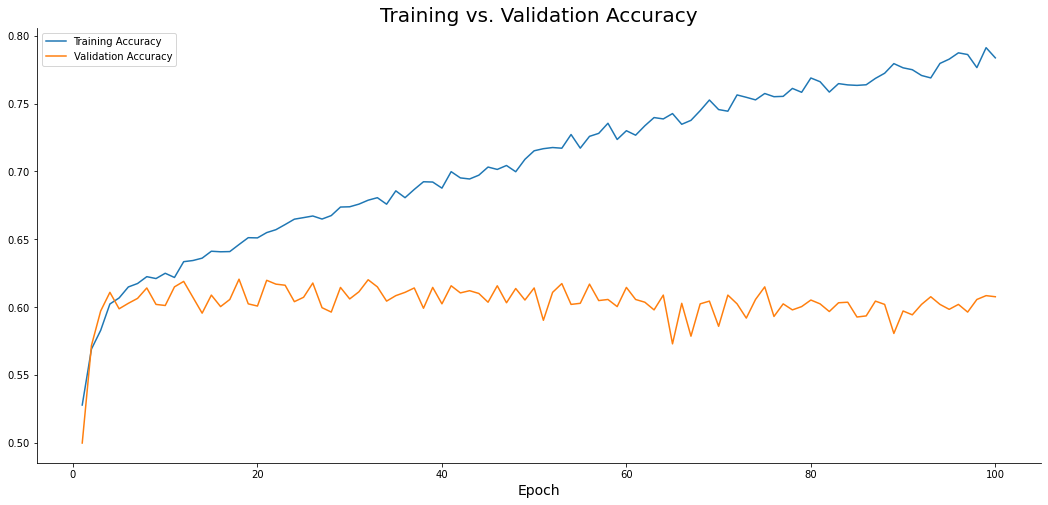

In [28]:
plt.plot(np.arange(1, 101), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 101), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

Epoch 1/500
157/157 [==============================] - 26s 155ms/step - loss: 1.0739 - accuracy: 0.5170 - val_loss: 0.6830 - val_accuracy: 0.5404
Epoch 2/500
157/157 [==============================] - 22s 141ms/step - loss: 0.6783 - accuracy: 0.5690 - val_loss: 0.6617 - val_accuracy: 0.6053
Epoch 3/500
157/157 [==============================] - 21s 131ms/step - loss: 0.6696 - accuracy: 0.5833 - val_loss: 0.6606 - val_accuracy: 0.6049
Epoch 4/500
157/157 [==============================] - 22s 138ms/step - loss: 0.6595 - accuracy: 0.6036 - val_loss: 0.6651 - val_accuracy: 0.5916
Epoch 5/500
157/157 [==============================] - 22s 140ms/step - loss: 0.6572 - accuracy: 0.6070 - val_loss: 0.6532 - val_accuracy: 0.6215
Epoch 6/500
157/157 [==============================] - 22s 140ms/step - loss: 0.6528 - accuracy: 0.6127 - val_loss: 0.6558 - val_accuracy: 0.6106
Epoch 7/500
157/157 [==============================] - 22s 142ms/step - loss: 0.6484 - accuracy: 0.6177 - val_loss: 0.6531 -

Epoch 57/500
157/157 [==============================] - 22s 138ms/step - loss: 0.4922 - accuracy: 0.7530 - val_loss: 0.8696 - val_accuracy: 0.6162
Epoch 58/500
157/157 [==============================] - 20s 131ms/step - loss: 0.4833 - accuracy: 0.7538 - val_loss: 0.7714 - val_accuracy: 0.5993
Epoch 59/500
157/157 [==============================] - 21s 135ms/step - loss: 0.4952 - accuracy: 0.7475 - val_loss: 0.8305 - val_accuracy: 0.6045
Epoch 60/500
157/157 [==============================] - 21s 133ms/step - loss: 0.4838 - accuracy: 0.7543 - val_loss: 0.8401 - val_accuracy: 0.6053
Epoch 61/500
157/157 [==============================] - 21s 137ms/step - loss: 0.4883 - accuracy: 0.7541 - val_loss: 0.8199 - val_accuracy: 0.5936
Epoch 62/500
157/157 [==============================] - 20s 130ms/step - loss: 0.4812 - accuracy: 0.7570 - val_loss: 0.8381 - val_accuracy: 0.6082
Epoch 63/500
157/157 [==============================] - 21s 134ms/step - loss: 0.4678 - accuracy: 0.7641 - val_loss: 0

157/157 [==============================] - 22s 137ms/step - loss: 0.3158 - accuracy: 0.8524 - val_loss: 1.5359 - val_accuracy: 0.6009
Epoch 113/500
157/157 [==============================] - 22s 139ms/step - loss: 0.3013 - accuracy: 0.8580 - val_loss: 1.4395 - val_accuracy: 0.6005
Epoch 114/500
157/157 [==============================] - 21s 133ms/step - loss: 0.3026 - accuracy: 0.8581 - val_loss: 1.4134 - val_accuracy: 0.5981
Epoch 115/500
157/157 [==============================] - 20s 130ms/step - loss: 0.3085 - accuracy: 0.8556 - val_loss: 1.5587 - val_accuracy: 0.6045
Epoch 116/500
157/157 [==============================] - 21s 134ms/step - loss: 0.2833 - accuracy: 0.8683 - val_loss: 1.4009 - val_accuracy: 0.5997
Epoch 117/500
157/157 [==============================] - 23s 145ms/step - loss: 0.2907 - accuracy: 0.8609 - val_loss: 1.6714 - val_accuracy: 0.6045
Epoch 118/500
157/157 [==============================] - 24s 153ms/step - loss: 0.2786 - accuracy: 0.8690 - val_loss: 1.8796 -

157/157 [==============================] - 25s 160ms/step - loss: 0.1873 - accuracy: 0.9183 - val_loss: 2.0716 - val_accuracy: 0.5944
Epoch 168/500
157/157 [==============================] - 21s 134ms/step - loss: 0.1593 - accuracy: 0.9293 - val_loss: 2.3880 - val_accuracy: 0.5722
Epoch 169/500
157/157 [==============================] - 21s 134ms/step - loss: 0.1807 - accuracy: 0.9224 - val_loss: 2.3305 - val_accuracy: 0.6158
Epoch 170/500
157/157 [==============================] - 32s 205ms/step - loss: 0.1859 - accuracy: 0.9186 - val_loss: 1.9571 - val_accuracy: 0.5964
Epoch 171/500
157/157 [==============================] - 30s 194ms/step - loss: 0.1497 - accuracy: 0.9344 - val_loss: 2.4876 - val_accuracy: 0.6013
Epoch 172/500
157/157 [==============================] - 27s 171ms/step - loss: 0.1585 - accuracy: 0.9318 - val_loss: 2.6167 - val_accuracy: 0.5981
Epoch 173/500
157/157 [==============================] - 29s 187ms/step - loss: 0.1616 - accuracy: 0.9281 - val_loss: 2.6282 -

157/157 [==============================] - 31s 200ms/step - loss: 0.1116 - accuracy: 0.9561 - val_loss: 2.9859 - val_accuracy: 0.5860
Epoch 223/500
157/157 [==============================] - 21s 131ms/step - loss: 0.1033 - accuracy: 0.9600 - val_loss: 2.8233 - val_accuracy: 0.5847
Epoch 224/500
157/157 [==============================] - 24s 155ms/step - loss: 0.1157 - accuracy: 0.9566 - val_loss: 2.9039 - val_accuracy: 0.5948
Epoch 225/500
157/157 [==============================] - 27s 174ms/step - loss: 0.1059 - accuracy: 0.9585 - val_loss: 3.0561 - val_accuracy: 0.5985
Epoch 226/500
157/157 [==============================] - 28s 181ms/step - loss: 0.1276 - accuracy: 0.9489 - val_loss: 2.8651 - val_accuracy: 0.5944
Epoch 227/500
157/157 [==============================] - 28s 177ms/step - loss: 0.1166 - accuracy: 0.9528 - val_loss: 2.7595 - val_accuracy: 0.5904
Epoch 228/500
157/157 [==============================] - 27s 171ms/step - loss: 0.0996 - accuracy: 0.9615 - val_loss: 2.7075 -

157/157 [==============================] - 22s 139ms/step - loss: 0.0445 - accuracy: 0.9845 - val_loss: 3.5615 - val_accuracy: 0.5912
Epoch 278/500
157/157 [==============================] - 22s 138ms/step - loss: 0.1276 - accuracy: 0.9578 - val_loss: 1.8196 - val_accuracy: 0.5884
Epoch 279/500
157/157 [==============================] - 22s 140ms/step - loss: 0.0840 - accuracy: 0.9702 - val_loss: 3.3569 - val_accuracy: 0.6013
Epoch 280/500
157/157 [==============================] - 21s 134ms/step - loss: 0.0770 - accuracy: 0.9703 - val_loss: 3.1238 - val_accuracy: 0.6033
Epoch 281/500
157/157 [==============================] - 22s 137ms/step - loss: 0.0625 - accuracy: 0.9769 - val_loss: 3.1396 - val_accuracy: 0.6017
Epoch 282/500
157/157 [==============================] - 21s 137ms/step - loss: 0.0943 - accuracy: 0.9657 - val_loss: 2.8920 - val_accuracy: 0.5969
Epoch 283/500
157/157 [==============================] - 22s 139ms/step - loss: 0.0427 - accuracy: 0.9846 - val_loss: 3.5960 -

157/157 [==============================] - 24s 156ms/step - loss: 0.0129 - accuracy: 0.9970 - val_loss: 4.0130 - val_accuracy: 0.6025
Epoch 333/500
157/157 [==============================] - 23s 146ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 4.3456 - val_accuracy: 0.6017
Epoch 334/500
157/157 [==============================] - 24s 155ms/step - loss: 0.1316 - accuracy: 0.9543 - val_loss: 1.7336 - val_accuracy: 0.5831
Epoch 335/500
157/157 [==============================] - 23s 145ms/step - loss: 0.0470 - accuracy: 0.9851 - val_loss: 3.5444 - val_accuracy: 0.6021
Epoch 336/500
157/157 [==============================] - 40s 258ms/step - loss: 0.0122 - accuracy: 0.9970 - val_loss: 3.9782 - val_accuracy: 0.5960
Epoch 337/500
157/157 [==============================] - 30s 189ms/step - loss: 0.0904 - accuracy: 0.9675 - val_loss: 2.7635 - val_accuracy: 0.5799
Epoch 338/500
157/157 [==============================] - 28s 179ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 3.8485 -

157/157 [==============================] - 22s 139ms/step - loss: 0.0417 - accuracy: 0.9853 - val_loss: 3.7057 - val_accuracy: 0.5940
Epoch 388/500
157/157 [==============================] - 24s 152ms/step - loss: 0.0951 - accuracy: 0.9695 - val_loss: 3.0594 - val_accuracy: 0.6005
Epoch 389/500
157/157 [==============================] - 70s 447ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 3.2364 - val_accuracy: 0.5928
Epoch 390/500
157/157 [==============================] - 47s 300ms/step - loss: 0.0344 - accuracy: 0.9882 - val_loss: 4.0048 - val_accuracy: 0.6009
Epoch 391/500
157/157 [==============================] - 42s 267ms/step - loss: 0.0085 - accuracy: 0.9978 - val_loss: 4.1957 - val_accuracy: 0.5969
Epoch 392/500
157/157 [==============================] - 63s 399ms/step - loss: 0.0637 - accuracy: 0.9787 - val_loss: 3.4062 - val_accuracy: 0.5900
Epoch 393/500
157/157 [==============================] - 38s 242ms/step - loss: 0.0639 - accuracy: 0.9767 - val_loss: 3.1884 -

157/157 [==============================] - 31s 200ms/step - loss: 0.0121 - accuracy: 0.9972 - val_loss: 5.1772 - val_accuracy: 0.5872
Epoch 443/500
157/157 [==============================] - 30s 193ms/step - loss: 0.2339 - accuracy: 0.9171 - val_loss: 3.1197 - val_accuracy: 0.5964
Epoch 444/500
157/157 [==============================] - 25s 160ms/step - loss: 0.0690 - accuracy: 0.9760 - val_loss: 3.5702 - val_accuracy: 0.5973
Epoch 445/500
157/157 [==============================] - 30s 191ms/step - loss: 0.0565 - accuracy: 0.9809 - val_loss: 3.5478 - val_accuracy: 0.5864
Epoch 446/500
157/157 [==============================] - 27s 175ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 4.0042 - val_accuracy: 0.6053
Epoch 447/500
157/157 [==============================] - 33s 207ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 4.4710 - val_accuracy: 0.5936
Epoch 448/500
157/157 [==============================] - 32s 201ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 3.1078 -

157/157 [==============================] - 24s 151ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 4.2048 - val_accuracy: 0.5936
Epoch 498/500
157/157 [==============================] - 24s 154ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 4.5207 - val_accuracy: 0.5989
Epoch 499/500
157/157 [==============================] - 23s 144ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 4.7572 - val_accuracy: 0.5960
Epoch 500/500
157/157 [==============================] - 24s 150ms/step - loss: 6.9381e-04 - accuracy: 0.9999 - val_loss: 4.9506 - val_accuracy: 0.5973


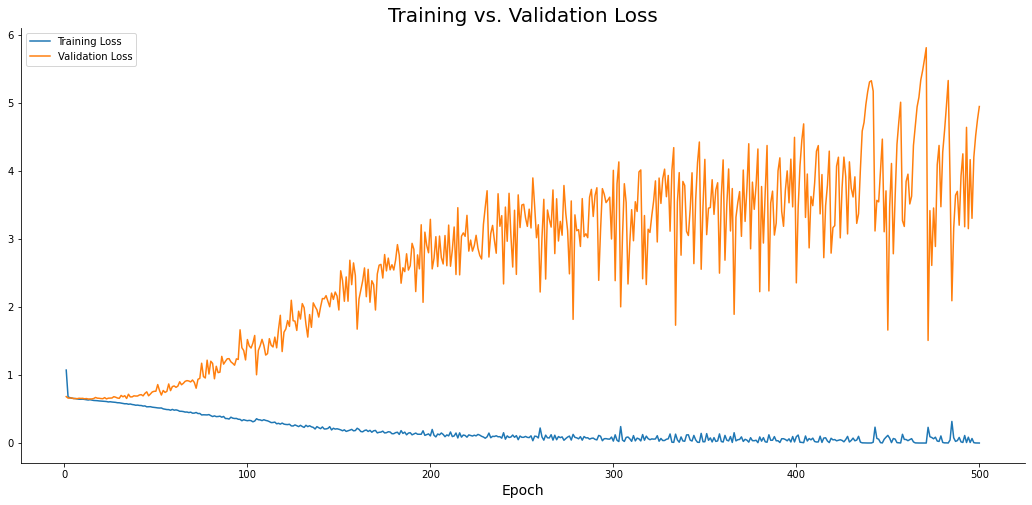

In [31]:
plt.plot(np.arange(1, 501), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 501), history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

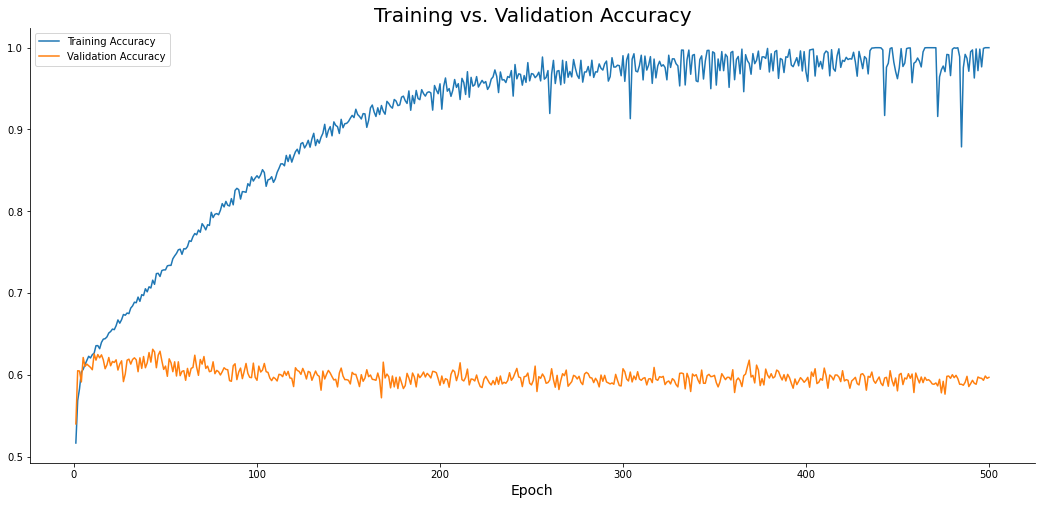

In [32]:
plt.plot(np.arange(1, 501), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 501), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [33]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=512,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
40/40 [==============================] - 21s 470ms/step - loss: 1.7832 - accuracy: 0.5016 - val_loss: 0.7360 - val_accuracy: 0.5000
Epoch 2/50
40/40 [==============================] - 15s 386ms/step - loss: 0.7530 - accuracy: 0.5342 - val_loss: 0.6729 - val_accuracy: 0.5815
Epoch 3/50
40/40 [==============================] - 15s 378ms/step - loss: 0.6758 - accuracy: 0.5716 - val_loss: 0.6951 - val_accuracy: 0.5250
Epoch 4/50
40/40 [==============================] - 15s 382ms/step - loss: 0.6847 - accuracy: 0.5627 - val_loss: 0.6649 - val_accuracy: 0.5985
Epoch 5/50
40/40 [==============================] - 15s 376ms/step - loss: 0.6622 - accuracy: 0.6005 - val_loss: 0.6750 - val_accuracy: 0.5847
Epoch 6/50
40/40 [==============================] - 16s 392ms/step - loss: 0.6609 - accuracy: 0.6041 - val_loss: 0.6633 - val_accuracy: 0.6021
Epoch 7/50
40/40 [==============================] - 16s 407ms/step - loss: 0.6639 - accuracy: 0.5979 - val_loss: 0.6574 - val_accuracy: 0.6122

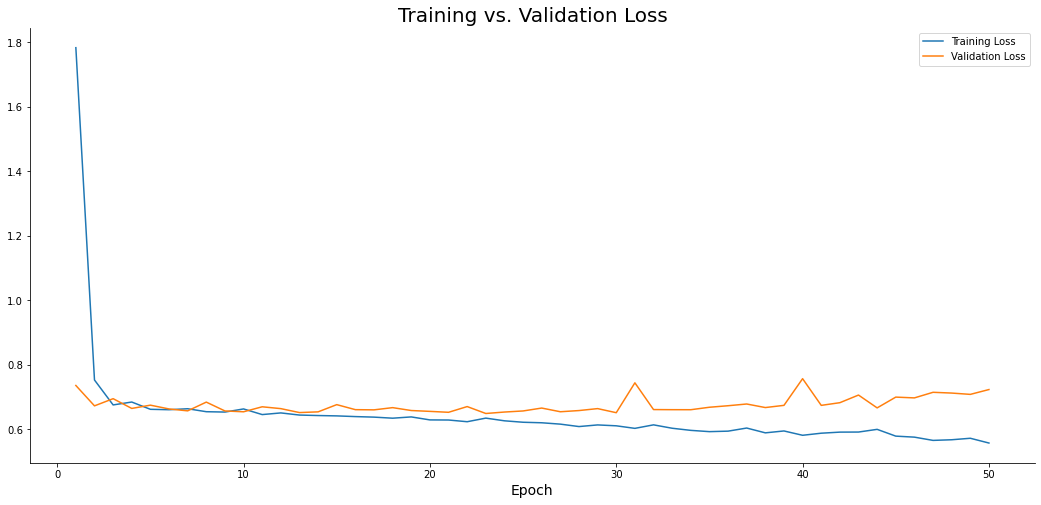

In [34]:
plt.plot(np.arange(1, 51), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 51), history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

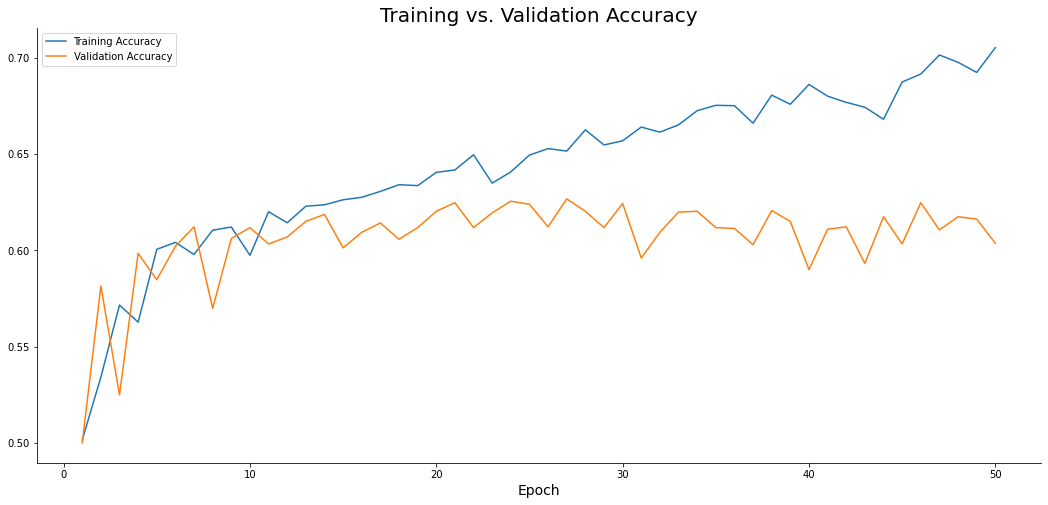

In [35]:
plt.plot(np.arange(1, 51), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 51), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();